# Network Analysis with NetworkX

In this series of lessons, we're going to learn about network analysis. Network analysis will help us better understand the complex relationships between kinds of things.

## Dataset

### *Duolingo Language Popularity By Country*

<blockquote class="epigraph" style=" padding: 10px">
Duolingo is the world’s most popular language learning app. The company’s mission is to create the best education on the planet and make it accessible to everyone. Learning with Duolingo is fun, and research shows it works!
</blockquote>

## Network Basics

## Install NetworkX

In [2]:
!pip install networkx

## Import Libraries

In [3]:
import networkx
import pandas as pd
#pd.set_option('max_rows', 400)
import matplotlib.pyplot as plt

## *Duolingo Language* Network





| Network Element      | GOT |         
| :-------------: |:-------------:|
| Node    | Languages |
| Edge     | Countrys Learning Popularity   |
| Float | Decimal Numbers      |  
| Boolean | True/False     |   


For example, the following sentence counts as an "edge" or connection between English and German by Afghanistan:

	country	pop1_2023	pop2_2023
1	 Afghanistan - English - German

:::{admonition} Pandas Review
:class: pandasreview
 Do you need a refresher or introduction to the Python data analysis library Pandas? Be sure to check out <a href="https://melaniewalsh.github.io/Intro-Cultural-Analytics/Data-Analysis/Pandas-Basics-Part1.html"> Pandas Basics (1-3) </a> in this textbook!
:::

In [4]:
url = 'https://raw.githubusercontent.com/Harofry/Analises-de-redes-segunda-unidade/main/duolingo_language_report_by_country.csv'
got_df = pd.read_csv(url)

In [5]:
got_df

,Unnamed: 0,country,pop1_2020,pop2_2020,pop1_2021,pop2_2021,pop1_2022,pop2_2022,pop1_2023,pop2_2023
0,1,Afghanistan,English,Spanish,English,Turkish,German,English,English,German
1,2,Albania,German,English,German,English,German,English,German,English
2,3,Algeria,English,French,English,French,English,French,English,French
3,4,Andorra,English,French,English,French,English,French,English,French
4,5,Angola,English,French,English,French,English,French,English,French
...,...,...,...,...,...,...,...,...,...,...
188,189,Venezuela,English,Italian,English,Italian,English,French,English,Portuguese
189,190,Vietnam,English,Chinese,English,Chinese,English,Chinese,English,Chinese
190,191,Yemen,English,French,English,French,English,French,English,French
191,192,Zambia,French,Spanish,French,Spanish,French,Spanish,French,Spanish


## Create a Network From a Pandas DataFrame

In [54]:
G = networkx.from_pandas_edgelist(got_df, 'pop1_2023','pop2_2023','country')

## Output a Network File

In [55]:
networkx.write_graphml(G, 'GOT-network.graphml')

## Draw a Simple Network

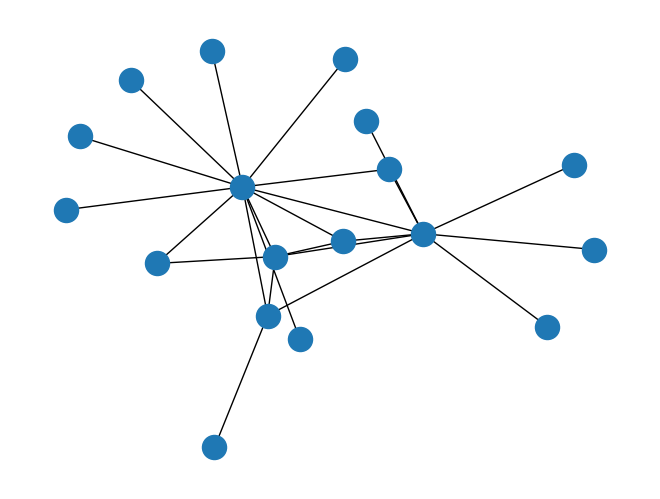

In [56]:
networkx.draw(G)

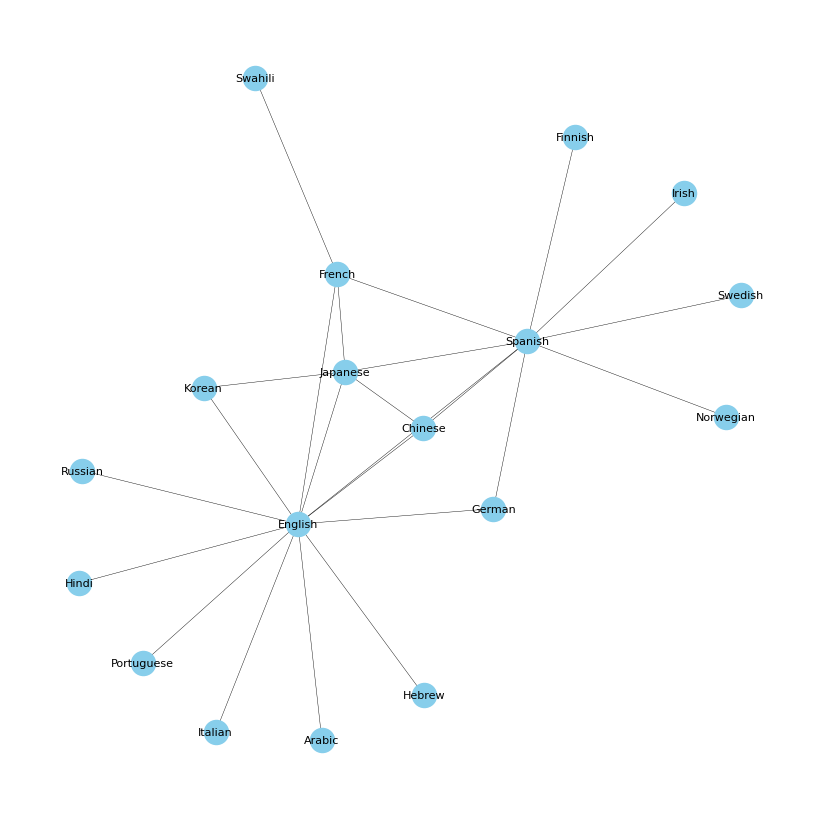

In [57]:
plt.figure(figsize=(8,8))
networkx.draw(G, with_labels=True, node_color='skyblue', width=.3, font_size=8)

## Calculate Degree

Who has the most number of connections in the network?

In [58]:
networkx.degree(G)

DegreeView({'English': 12, 'German': 2, 'French': 4, 'Spanish': 9, 'Italian': 1, 'Russian': 1, 'Korean': 2, 'Japanese': 5, 'Portuguese': 1, 'Chinese': 3, 'Finnish': 1, 'Hindi': 1, 'Irish': 1, 'Hebrew': 1, 'Norwegian': 1, 'Arabic': 1, 'Swedish': 1, 'Swahili': 1})

Make the degree values a `dict`ionary, then add it as a network "attribute" with `networkx.set_node_attributes()`

In [59]:
degrees = dict(networkx.degree(G))
networkx.set_node_attributes(G, name='degree', values=degrees)

Make a Pandas dataframe from the degree data `G.nodes(data='degree')`, then sort from highest to lowest

In [60]:
degree_df = pd.DataFrame(G.nodes(data='degree'), columns=['node', 'degree'])
degree_df = degree_df.sort_values(by='degree', ascending=False)
degree_df

,node,degree
0,English,12
3,Spanish,9
7,Japanese,5
2,French,4
9,Chinese,3
6,Korean,2
1,German,2
5,Russian,1
4,Italian,1
8,Portuguese,1


Plot the nodes with the highest degree values

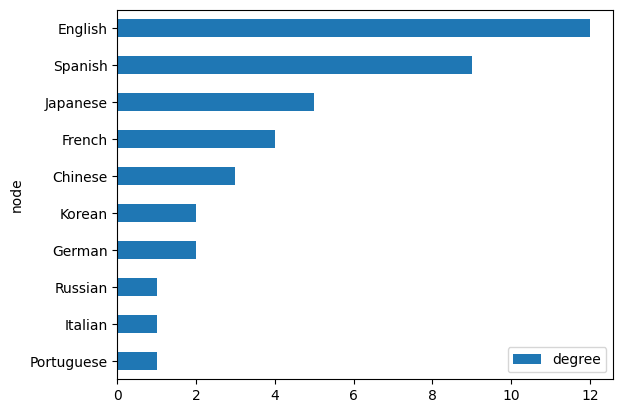

In [61]:
num_nodes_to_inspect = 10
degree_df[:num_nodes_to_inspect].plot(x='node', y='degree', kind='barh').invert_yaxis()

## Calculate Weighted Degree

Who has the most number of connections in the network (if you factor in edge weight)?

In [62]:
networkx.degree(G, weight='Weight')

DegreeView({'English': 12, 'German': 2, 'French': 4, 'Spanish': 9, 'Italian': 1, 'Russian': 1, 'Korean': 2, 'Japanese': 5, 'Portuguese': 1, 'Chinese': 3, 'Finnish': 1, 'Hindi': 1, 'Irish': 1, 'Hebrew': 1, 'Norwegian': 1, 'Arabic': 1, 'Swedish': 1, 'Swahili': 1})

Make the weighted degree values a `dict`ionary, then add it as a network "attribute" with `networkx.set_node_attributes()`

In [63]:
weighted_degrees = dict(networkx.degree(G, weight='Weight'))
networkx.set_node_attributes(G, name='weighted_degree', values=weighted_degrees)

Make a Pandas dataframe from the degree data `G.nodes(data='weighted_degree')`, then sort from highest to lowest

In [64]:
weighted_degree_df = pd.DataFrame(G.nodes(data='weighted_degree'), columns=['node', 'weighted_degree'])
weighted_degree_df = weighted_degree_df.sort_values(by='weighted_degree', ascending=False)
weighted_degree_df

,node,weighted_degree
0,English,12
3,Spanish,9
7,Japanese,5
2,French,4
9,Chinese,3
6,Korean,2
1,German,2
5,Russian,1
4,Italian,1
8,Portuguese,1


Plot the nodes with the highest weighted degree values

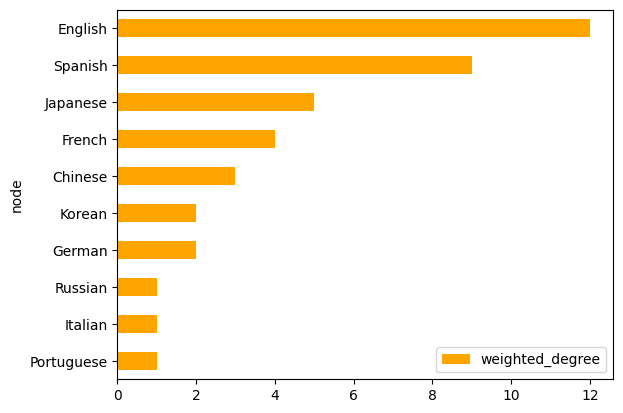

In [65]:
num_nodes_to_inspect = 10
weighted_degree_df[:num_nodes_to_inspect].plot(x='node', y='weighted_degree', color='orange', kind='barh').invert_yaxis()

## Calculate Betweenness Centrality Scores

Who connects the most other nodes in the network?

In [66]:
networkx.betweenness_centrality(G)

{'English': 0.6519607843137255,
 'German': 0.0,
 'French': 0.11764705882352941,
 'Spanish': 0.446078431372549,
 'Italian': 0.0,
 'Russian': 0.0,
 'Korean': 0.0,
 'Japanese': 0.03431372549019608,
 'Portuguese': 0.0,
 'Chinese': 0.0,
 'Finnish': 0.0,
 'Hindi': 0.0,
 'Irish': 0.0,
 'Hebrew': 0.0,
 'Norwegian': 0.0,
 'Arabic': 0.0,
 'Swedish': 0.0,
 'Swahili': 0.0}

In [67]:
betweenness_centrality = networkx.betweenness_centrality(G)

Add `betweenness_centrality` (which is already a dictionary) as a network "attribute" with `networkx.set_node_attributes()`

In [68]:
networkx.set_node_attributes(G, name='betweenness', values=betweenness_centrality)

Make a Pandas dataframe from the betweenness data `G.nodes(data='betweenness')`, then sort from highest to lowest

In [69]:
betweenness_df = pd.DataFrame(G.nodes(data='betweenness'), columns=['node', 'betweenness'])
betweenness_df = betweenness_df.sort_values(by='betweenness', ascending=False)
betweenness_df

,node,betweenness
0,English,0.651961
3,Spanish,0.446078
2,French,0.117647
7,Japanese,0.034314
11,Hindi,0.000000
16,Swedish,0.000000
15,Arabic,0.000000
14,Norwegian,0.000000
13,Hebrew,0.000000
12,Irish,0.000000


Plot the nodes with the highest betweenness centrality scores

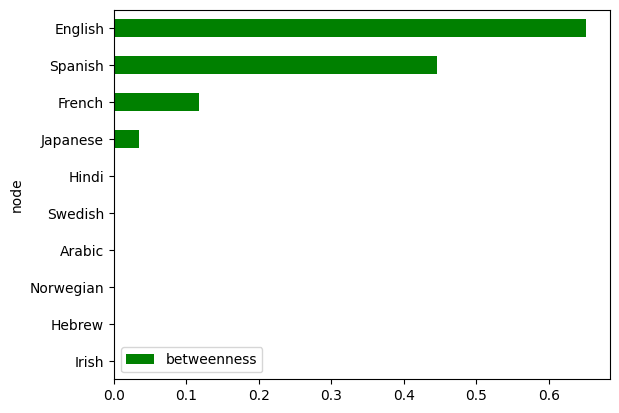

In [70]:
num_nodes_to_inspect = 10
betweenness_df[:num_nodes_to_inspect].plot(x='node', y='betweenness', color='green', kind='barh').invert_yaxis()

## Communities

Who forms distinct communities within this network?

In [71]:
from networkx.algorithms import community

Calculate communities with `community.greedy_modularity_communities()`

In [72]:
communities = community.greedy_modularity_communities(G)

In [73]:
communities

[frozenset({'Arabic',
            'English',
            'Hebrew',
            'Hindi',
            'Italian',
            'Portuguese',
            'Russian'}),
 frozenset({'Finnish', 'German', 'Irish', 'Norwegian', 'Spanish', 'Swedish'}),
 frozenset({'Chinese', 'Japanese', 'Korean'}),
 frozenset({'French', 'Swahili'})]

Make a `dict`ionary by looping through the communities and, for each member of the community, adding their community number

In [74]:
# Create empty dictionary
modularity_class = {}
#Loop through each community in the network
for community_number, community in enumerate(communities):
    #For each member of the community, add their community number
    for name in community:
        modularity_class[name] = community_number

Add modularity class to the network as an attribute

In [75]:
networkx.set_node_attributes(G, modularity_class, 'modularity_class')

Make a Pandas dataframe from modularity class network data `G.nodes(data='modularity_class')`

In [76]:
communities_df = pd.DataFrame(G.nodes(data='modularity_class'), columns=['node', 'modularity_class'])
communities_df = communities_df.sort_values(by='modularity_class', ascending=False)

In [77]:
communities_df

,node,modularity_class
17,Swahili,3
2,French,3
6,Korean,2
7,Japanese,2
9,Chinese,2
3,Spanish,1
1,German,1
10,Finnish,1
12,Irish,1
14,Norwegian,1


Inspect each community in the network

In [78]:
communities_df[communities_df['modularity_class'] == 4]

,node,modularity_class


In [79]:
communities_df[communities_df['modularity_class'] == 3]

,node,modularity_class
17,Swahili,3
2,French,3


In [80]:
communities_df[communities_df['modularity_class'] == 2]

,node,modularity_class
6,Korean,2
7,Japanese,2
9,Chinese,2


In [81]:
communities_df[communities_df['modularity_class'] == 1]

,node,modularity_class
3,Spanish,1
1,German,1
10,Finnish,1
12,Irish,1
14,Norwegian,1
16,Swedish,1


In [82]:
communities_df[communities_df['modularity_class'] == 0]

,node,modularity_class
5,Russian,0
4,Italian,0
8,Portuguese,0
11,Hindi,0
13,Hebrew,0
15,Arabic,0
0,English,0


Plot a sample of 40 characters with their modularity class indicated by a star

In [83]:
import seaborn as sns

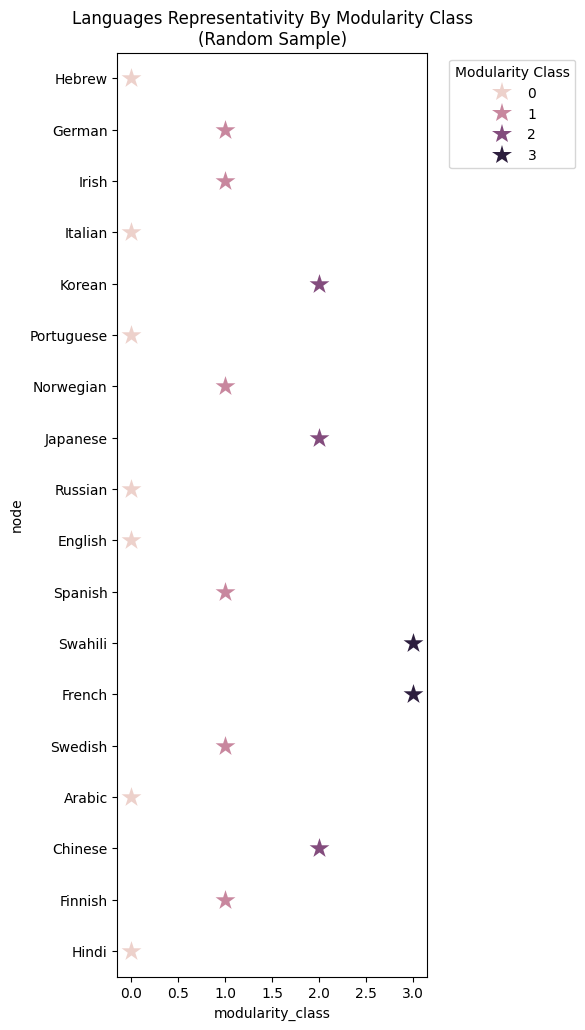

In [84]:
#Set figure size
plt.figure(figsize=(4,12))

#Plot a categorical scatter plot from the dataframe communities_df
# Sample a number of items less than or equal to the number of rows in the DataFrame
sample_size = min(40, len(communities_df))
ax =sns.stripplot(x='modularity_class', y='node', data=communities_df.sample(sample_size),
              hue='modularity_class', marker='*',size=15)
#Set legend outside the plot with bbox_to_anchor
ax.legend(loc='upper right',bbox_to_anchor=(1.5, 1), title='Modularity Class')
ax.set_title("Languages Representativity By Modularity Class\n(Random Sample)")
plt.show()

Plot all GOT characters with their modularity class indicated by a star (tak

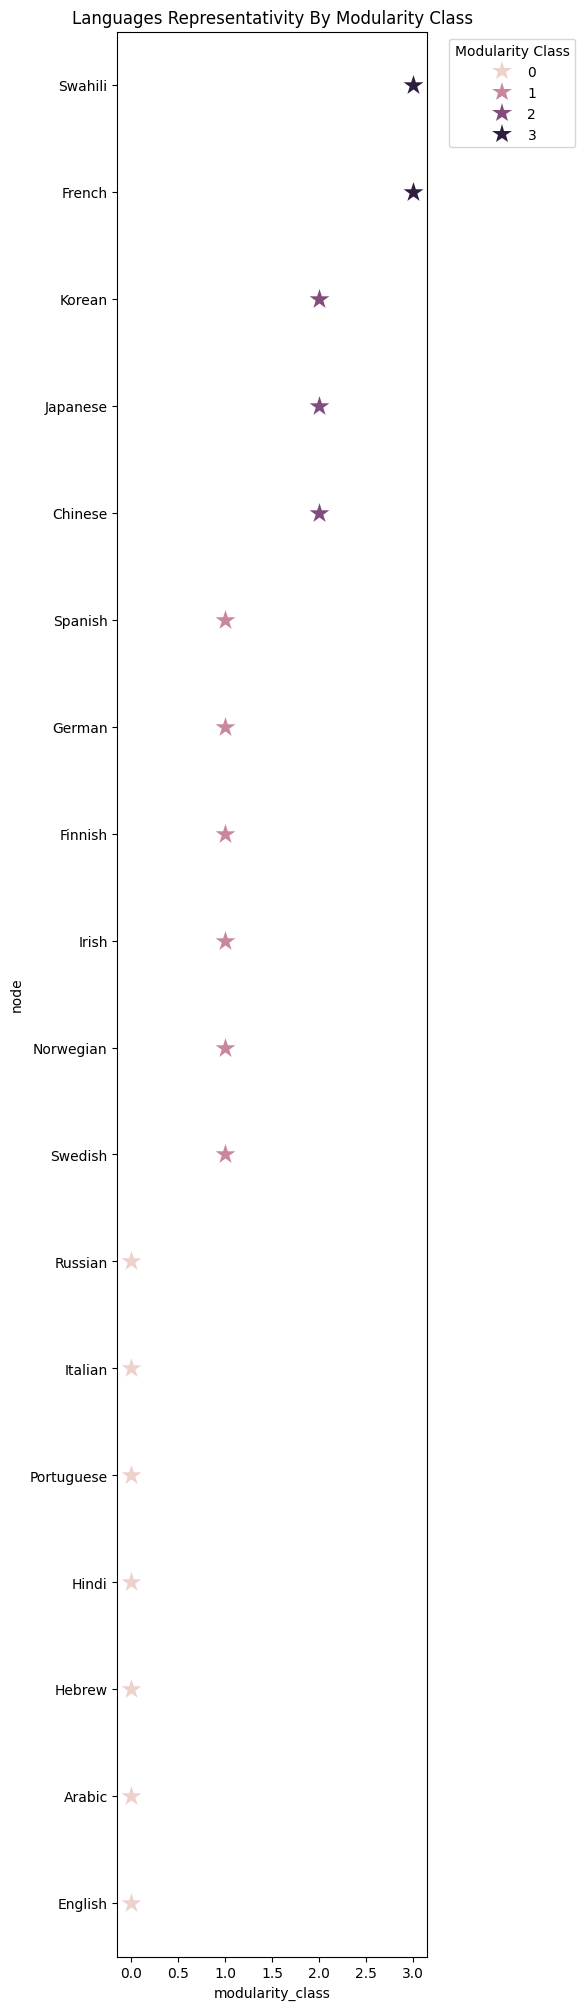

In [85]:
plt.figure(figsize=(4,25))

ax =sns.stripplot(x='modularity_class', y='node', data=communities_df,
              hue='modularity_class', marker='*',size=15)

ax.legend(loc='upper right',bbox_to_anchor=(1.5, 1), title='Modularity Class')
ax.set_title("Languages Representativity By Modularity Class")
plt.show()

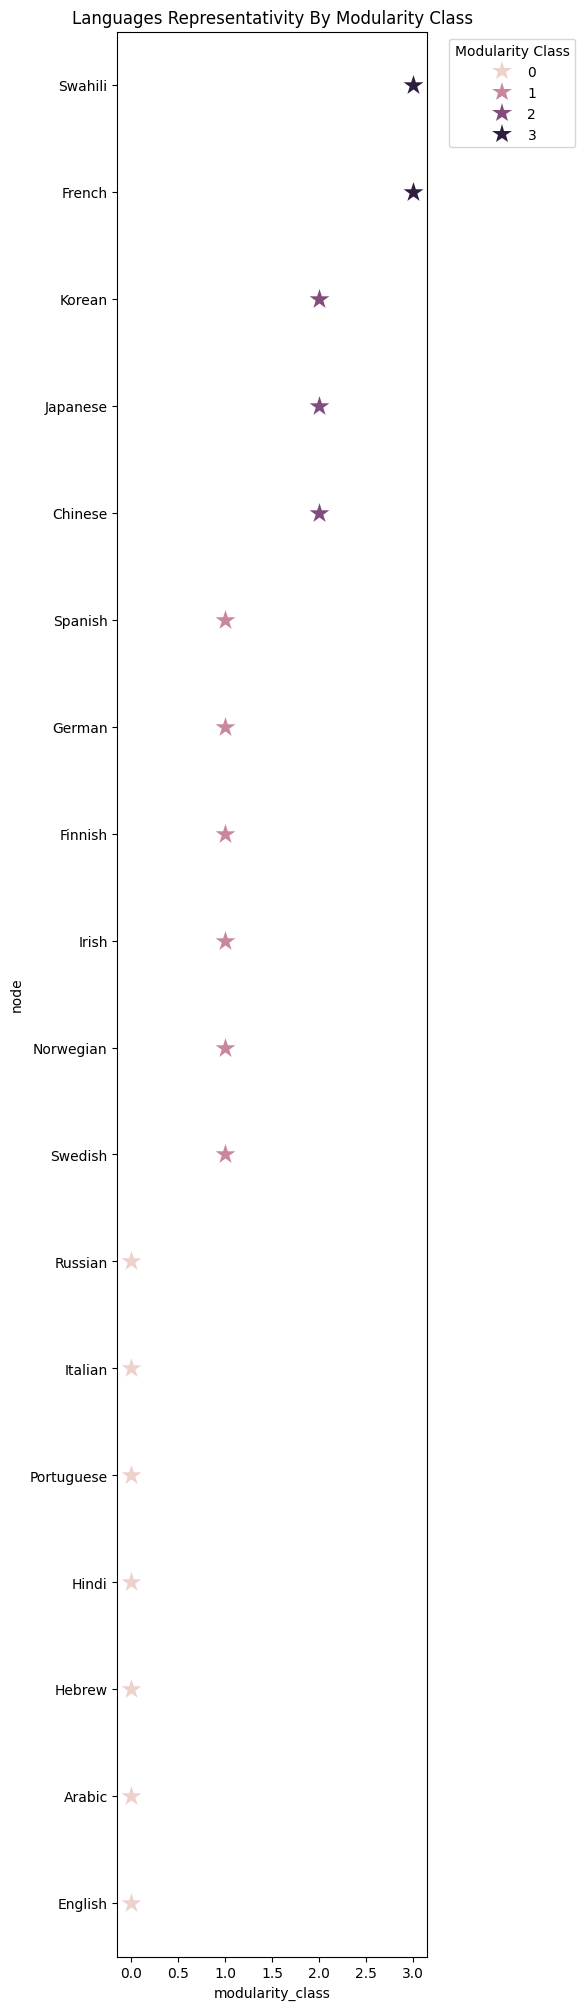

In [86]:
plt.figure(figsize=(4,25))

ax =sns.stripplot(x='modularity_class', y='node', data=communities_df,
              hue='modularity_class', marker='*',size=15)

ax.legend(loc='upper right',bbox_to_anchor=(1.5, 1), title='Modularity Class')
ax.set_title("Languages Representativity By Modularity Class")
plt.show()

## All Network Metrics

Create a Pandas dataframe of all network attributes by creating a `dict`ionary of `G.nodes(data=True)`...

In [87]:
dict(G.nodes(data=True))

{'English': {'degree': 12,
  'weighted_degree': 12,
  'betweenness': 0.6519607843137255,
  'modularity_class': 0},
 'German': {'degree': 2,
  'weighted_degree': 2,
  'betweenness': 0.0,
  'modularity_class': 1},
 'French': {'degree': 4,
  'weighted_degree': 4,
  'betweenness': 0.11764705882352941,
  'modularity_class': 3},
 'Spanish': {'degree': 9,
  'weighted_degree': 9,
  'betweenness': 0.446078431372549,
  'modularity_class': 1},
 'Italian': {'degree': 1,
  'weighted_degree': 1,
  'betweenness': 0.0,
  'modularity_class': 0},
 'Russian': {'degree': 1,
  'weighted_degree': 1,
  'betweenness': 0.0,
  'modularity_class': 0},
 'Korean': {'degree': 2,
  'weighted_degree': 2,
  'betweenness': 0.0,
  'modularity_class': 2},
 'Japanese': {'degree': 5,
  'weighted_degree': 5,
  'betweenness': 0.03431372549019608,
  'modularity_class': 2},
 'Portuguese': {'degree': 1,
  'weighted_degree': 1,
  'betweenness': 0.0,
  'modularity_class': 0},
 'Chinese': {'degree': 3,
  'weighted_degree': 3,
  'b

...and then [transposing it](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.T.html) (flipping the columns and rows) with `.T`

In [88]:
nodes_df = pd.DataFrame(dict(G.nodes(data=True))).T
nodes_df

,degree,weighted_degree,betweenness,modularity_class
English,12.0,12.0,0.651961,0.0
German,2.0,2.0,0.000000,1.0
French,4.0,4.0,0.117647,3.0
Spanish,9.0,9.0,0.446078,1.0
Italian,1.0,1.0,0.000000,0.0
Russian,1.0,1.0,0.000000,0.0
Korean,2.0,2.0,0.000000,2.0
Japanese,5.0,5.0,0.034314,2.0
Portuguese,1.0,1.0,0.000000,0.0
Chinese,3.0,3.0,0.000000,2.0


In [89]:
nodes_df.sort_values(by='betweenness', ascending=False)

,degree,weighted_degree,betweenness,modularity_class
English,12.0,12.0,0.651961,0.0
Spanish,9.0,9.0,0.446078,1.0
French,4.0,4.0,0.117647,3.0
Japanese,5.0,5.0,0.034314,2.0
Hindi,1.0,1.0,0.000000,0.0
Swedish,1.0,1.0,0.000000,1.0
Arabic,1.0,1.0,0.000000,0.0
Norwegian,1.0,1.0,0.000000,1.0
Hebrew,1.0,1.0,0.000000,0.0
Irish,1.0,1.0,0.000000,1.0
